In [6]:
import pandas as pd
import numpy as np

In [7]:
links, movies, ratings, tags = pd.read_csv("520_links.csv"), pd.read_csv("520_movies.csv"), pd.read_csv("520_ratings.csv"), pd.read_csv("520_tags.csv")

In [8]:
links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


In [9]:
links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [10]:
links.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [11]:
links[links.isnull().any(axis=1)]

,movieId,imdbId,tmdbId
624,791,113610,NaN
843,1107,102336,NaN
2141,2851,81454,NaN
3027,4051,56600,NaN
5532,26587,92337,NaN
5854,32600,377059,NaN
6059,40697,105946,NaN
7382,79299,874957,NaN


In [12]:
links["tmdbId"].fillna(-1, inplace=True)

In [ ]:
movies.describe()

,movieId,title,genres
count,9742,9742,9742
unique,9742,9737,951
top,movieId 1,Emma (1996),Drama
freq,1,2,1053


In [ ]:
movies.dtypes

movieId    object
title      object
genres     object
dtype: object

### Checking for duplicate values

In [15]:
movies[movies.duplicated()==True], ratings[ratings.duplicated()==True], tags[tags.duplicated()==True], links[links.duplicated()==True]

(Empty DataFrame
 Columns: [movieId, title, genres]
 Index: [],
 Empty DataFrame
 Columns: [userId, movieId, rating, timestamp]
 Index: [],
 Empty DataFrame
 Columns: [tag, timestamp, userId|movieId]
 Index: [],
 Empty DataFrame
 Columns: [movieId, imdbId, tmdbId]
 Index: [])

#### No duplicate values present within the columns

# Data quality issues:
### In the links dataset there are missing values for the tmdbId column
#### This is handled by replacing the values with a placeholder -1 indicating that a value doesn't exist
#### Timestamp for ratings and tags don't mean the same thing, will need to distnguish them.
#### movieId isn't consistent in all datasets and for tags it both includes movieId and userId in the same column, needs to be preprocessed.
#### We want the genres to be represented in a binary format indicating the presence or not of a given genre instead of a string being separated by "|"

## Schema Matching

In [ ]:
tags.columns = pd.Index(['tag', 'timestampTag', 'userId|movieId'])
ratings.columns = pd.Index(['userId', 'movieId', 'rating', 'timestampRatings'])

In [ ]:
ALL_COLUMNS = list(set(list(tags.columns) + list(ratings.columns) + list(movies.columns) + list(links.columns)))
Desired = ['movieId', 'title', 'genre_(no genres listed)', 'genre_Action',
       'genre_Adventure', 'genre_Animation', 'genre_Children', 'genre_Comedy',
       'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Fantasy',
       'genre_Film-Noir', 'genre_Horror', 'genre_IMAX', 'genre_Musical',
       'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi', 'genre_Thriller',
       'genre_War', 'genre_Western', 'userId', 'rating', 'timestampRatings',
       'imdbId', 'tmdbId', 'tag', 'timestampTag']
def jaccard_similarity(s1, s2):
  set1, set2 = set(s1), set(s2)
  intersection = len(set1.intersection(set2))
  union = len(set1.union(set2))
  similarity = intersection / union if union != 0 else 0
  return similarity

out = []
for i in range(len(Desired)):
  curr = []
  for j in range(len(ALL_COLUMNS)):
      curr.append(jaccard_similarity(Desired[i], ALL_COLUMNS[j]))
      # print(jaccard_similarity(Desired[i], ALL_COLUMNS[j]))
  out.append(curr)
jaccard_sim = pd.DataFrame(out, columns=ALL_COLUMNS, index=Desired)
jaccard_sim

,title,userId|movieId,userId,imdbId,tmdbId,rating,timestampRatings,genres,timestampTag,movieId,tag
movieId,0.222222,0.636364,0.300000,0.500000,0.333333,0.083333,0.214286,0.090909,0.230769,1.000000,0.000000
title,1.000000,0.153846,0.111111,0.125000,0.125000,0.250000,0.272727,0.125000,0.300000,0.222222,0.166667
genre_(no genres listed),0.285714,0.315789,0.250000,0.117647,0.117647,0.333333,0.333333,0.357143,0.277778,0.235294,0.133333
genre_Action,0.272727,0.235294,0.142857,0.071429,0.071429,0.454545,0.333333,0.363636,0.266667,0.214286,0.181818
genre_Adventure,0.166667,0.312500,0.333333,0.071429,0.153846,0.333333,0.250000,0.363636,0.187500,0.214286,0.181818
genre_Animation,0.250000,0.294118,0.133333,0.142857,0.142857,0.545455,0.500000,0.333333,0.428571,0.285714,0.272727
genre_Children,0.272727,0.235294,0.230769,0.153846,0.071429,0.333333,0.250000,0.363636,0.187500,0.214286,0.083333
genre_Comedy,0.076923,0.312500,0.230769,0.153846,0.153846,0.230769,0.250000,0.363636,0.187500,0.307692,0.083333
genre_Crime,0.200000,0.266667,0.166667,0.181818,0.083333,0.400000,0.384615,0.444444,0.307692,0.250000,0.100000
genre_Documentary,0.133333,0.263158,0.187500,0.058824,0.125000,0.357143,0.352941,0.285714,0.294118,0.176471,0.230769


## While there are some matches it is quite aparent that there are different timestamps that need to be handled (tag.timestamp doesn't imply ratings.timestamp), some inconsistencies in the starting schema and missing columns that need to be extract from the genre column

In [ ]:
def find_maximum_similarity_columns(jaccard_sim):
    # Iterate over each row and print the index and column with maximum value
    max_sim = []
    max_val = []
    for index, row in jaccard_sim.iterrows():
        max_column = row.idxmax()
        max_value = row[max_column]
        print(f"{index}, has maximum similarity with - {max_column} with a value of {max_value}")
        max_sim.append(max_column)
        max_val.append(max_value)
    jaccard_sim["max_sim"] = max_sim
    jaccard_sim["max_val"] = max_val
    return jaccard_sim

# find_maximum_similarity_columns(jaccard_sim)

In [ ]:
#jaccard_sim.to_csv("jaccard_sim.csv")

In [ ]:
import Levenshtein

def edit_distance(s1, s2):
  similarity = 1 / (1 + Levenshtein.distance(s1, s2))
  return similarity

edit_out = []
for i in range(len(Desired)):
  curr = []
  for j in range(len(ALL_COLUMNS)):
      curr.append(edit_distance(Desired[i], ALL_COLUMNS[j]))
  edit_out.append(curr)

edit_dist = pd.DataFrame(edit_out, columns=ALL_COLUMNS, index=Desired)
edit_dist

,title,userId|movieId,userId,imdbId,tmdbId,rating,timestampRatings,genres,timestampTag,movieId,tag
movieId,0.142857,0.125000,0.166667,0.166667,0.166667,0.142857,0.066667,0.142857,0.083333,1.000000,0.125000
title,1.000000,0.071429,0.142857,0.142857,0.166667,0.166667,0.071429,0.166667,0.100000,0.142857,0.200000
genre_(no genres listed),0.043478,0.047619,0.045455,0.041667,0.041667,0.045455,0.043478,0.052632,0.043478,0.045455,0.041667
genre_Action,0.083333,0.076923,0.083333,0.076923,0.076923,0.100000,0.071429,0.125000,0.076923,0.083333,0.083333
genre_Adventure,0.071429,0.066667,0.071429,0.066667,0.066667,0.071429,0.062500,0.090909,0.066667,0.071429,0.066667
genre_Animation,0.071429,0.071429,0.066667,0.071429,0.066667,0.083333,0.071429,0.090909,0.071429,0.066667,0.066667
genre_Children,0.076923,0.071429,0.076923,0.076923,0.071429,0.076923,0.062500,0.100000,0.071429,0.076923,0.066667
genre_Comedy,0.083333,0.083333,0.090909,0.083333,0.083333,0.083333,0.062500,0.125000,0.083333,0.090909,0.076923
genre_Crime,0.090909,0.076923,0.100000,0.083333,0.083333,0.100000,0.066667,0.142857,0.076923,0.090909,0.083333
genre_Documentary,0.058824,0.062500,0.062500,0.058824,0.058824,0.062500,0.058824,0.076923,0.066667,0.062500,0.062500


In [ ]:
# find_maximum_similarity_columns(edit_dist)

In [ ]:
final_df = jaccard_sim.add(edit_dist).div(2)
final_df

,title,userId|movieId,userId,imdbId,tmdbId,rating,timestampRatings,genres,timestampTag,movieId,tag
movieId,0.182540,0.380682,0.233333,0.333333,0.250000,0.113095,0.140476,0.116883,0.157051,1.000000,0.062500
title,1.000000,0.112637,0.126984,0.133929,0.145833,0.208333,0.172078,0.145833,0.200000,0.182540,0.183333
genre_(no genres listed),0.164596,0.181704,0.147727,0.079657,0.079657,0.189394,0.188406,0.204887,0.160628,0.140374,0.087500
genre_Action,0.178030,0.156109,0.113095,0.074176,0.074176,0.277273,0.202381,0.244318,0.171795,0.148810,0.132576
genre_Adventure,0.119048,0.189583,0.202381,0.069048,0.110256,0.202381,0.156250,0.227273,0.127083,0.142857,0.124242
genre_Animation,0.160714,0.182773,0.100000,0.107143,0.104762,0.314394,0.285714,0.212121,0.250000,0.176190,0.169697
genre_Children,0.174825,0.153361,0.153846,0.115385,0.071429,0.205128,0.156250,0.231818,0.129464,0.145604,0.075000
genre_Comedy,0.080128,0.197917,0.160839,0.118590,0.118590,0.157051,0.156250,0.244318,0.135417,0.199301,0.080128
genre_Crime,0.145455,0.171795,0.133333,0.132576,0.083333,0.250000,0.225641,0.293651,0.192308,0.170455,0.091667
genre_Documentary,0.096078,0.162829,0.125000,0.058824,0.091912,0.209821,0.205882,0.181319,0.180392,0.119485,0.146635


In [ ]:
find_maximum_similarity_columns(final_df)

movieId, has maximum similarity with - movieId with a value of 1.0
title, has maximum similarity with - title with a value of 1.0
genre_(no genres listed), has maximum similarity with - genres with a value of 0.20488721804511278
genre_Action, has maximum similarity with - rating with a value of 0.2772727272727273
genre_Adventure, has maximum similarity with - genres with a value of 0.2272727272727273
genre_Animation, has maximum similarity with - rating with a value of 0.3143939393939394
genre_Children, has maximum similarity with - genres with a value of 0.2318181818181818
genre_Comedy, has maximum similarity with - genres with a value of 0.24431818181818182
genre_Crime, has maximum similarity with - genres with a value of 0.2936507936507936
genre_Documentary, has maximum similarity with - rating with a value of 0.20982142857142858
genre_Drama, has maximum similarity with - genres with a value of 0.2936507936507936
genre_Fantasy, has maximum similarity with - genres with a value of 0.

,title,userId|movieId,userId,imdbId,tmdbId,rating,timestampRatings,genres,timestampTag,movieId,tag,max_sim,max_val
movieId,0.182540,0.380682,0.233333,0.333333,0.250000,0.113095,0.140476,0.116883,0.157051,1.000000,0.062500,movieId,1.000000
title,1.000000,0.112637,0.126984,0.133929,0.145833,0.208333,0.172078,0.145833,0.200000,0.182540,0.183333,title,1.000000
genre_(no genres listed),0.164596,0.181704,0.147727,0.079657,0.079657,0.189394,0.188406,0.204887,0.160628,0.140374,0.087500,genres,0.204887
genre_Action,0.178030,0.156109,0.113095,0.074176,0.074176,0.277273,0.202381,0.244318,0.171795,0.148810,0.132576,rating,0.277273
genre_Adventure,0.119048,0.189583,0.202381,0.069048,0.110256,0.202381,0.156250,0.227273,0.127083,0.142857,0.124242,genres,0.227273
genre_Animation,0.160714,0.182773,0.100000,0.107143,0.104762,0.314394,0.285714,0.212121,0.250000,0.176190,0.169697,rating,0.314394
genre_Children,0.174825,0.153361,0.153846,0.115385,0.071429,0.205128,0.156250,0.231818,0.129464,0.145604,0.075000,genres,0.231818
genre_Comedy,0.080128,0.197917,0.160839,0.118590,0.118590,0.157051,0.156250,0.244318,0.135417,0.199301,0.080128,genres,0.244318
genre_Crime,0.145455,0.171795,0.133333,0.132576,0.083333,0.250000,0.225641,0.293651,0.192308,0.170455,0.091667,genres,0.293651
genre_Documentary,0.096078,0.162829,0.125000,0.058824,0.091912,0.209821,0.205882,0.181319,0.180392,0.119485,0.146635,rating,0.209821


In [ ]:
final_df.to_csv("averaged_similarity.csv")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Example database column names
column_names = Desired

# Example list of terms
other_terms = ALL_COLUMNS

# Convert column names and other terms to lowercase (optional, depending on your use case)
column_names_lower = [name.lower() for name in column_names]
other_terms_lower = [term.lower() for term in other_terms]

# Create DataFrames with column names and other terms
df_column_names = pd.DataFrame({'Column Names': column_names_lower})
df_other_terms = pd.DataFrame({'Other Terms': other_terms_lower})

# Function to calculate cosine similarity based on character n-grams
def calculate_cosine_similarity(str1, str2):
    vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))
    vectors = vectorizer.fit_transform([str1, str2])
    similarity = cosine_similarity(vectors)
    return similarity[0, 1]

# Calculate similarity and create a DataFrame
similarity_out = []
for i in range(len(column_names)):
    curr = []
    for j in range(len(other_terms)):
        curr.append(calculate_cosine_similarity(column_names_lower[i], other_terms_lower[j]))
    similarity_out.append(curr)

similarity_df = pd.DataFrame(similarity_out, columns=other_terms, index=column_names)

# Print the resulting DataFrame
similarity_df

,title,userId|movieId,userId,imdbId,tmdbId,rating,timestampRatings,genres,timestampTag,movieId,tag
movieId,0.000000,0.574385,0.053551,0.053551,0.053551,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
title,1.000000,0.000000,0.000000,0.000000,0.000000,0.068050,0.073678,0.000000,0.041835,0.000000,0.000000
genre_(no genres listed),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024265,0.570860,0.028333,0.000000,0.000000
genre_Action,0.043828,0.000000,0.000000,0.000000,0.000000,0.038331,0.041501,0.359333,0.023565,0.000000,0.000000
genre_Adventure,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390302,0.000000,0.000000,0.000000
genre_Animation,0.038550,0.000000,0.000000,0.033715,0.000000,0.109643,0.096412,0.310185,0.042312,0.000000,0.000000
genre_Children,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.407220,0.000000,0.000000,0.000000
genre_Comedy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020241,0.359333,0.023565,0.000000,0.000000
genre_Crime,0.000000,0.022857,0.040349,0.040349,0.000000,0.000000,0.066785,0.381751,0.078221,0.000000,0.000000
genre_Documentary,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032665,0.324704,0.059240,0.000000,0.056087


In [ ]:
find_maximum_similarity_columns(similarity_df)

movieId, has maximum similarity with - movieId with a value of 1.0000000000000002
title, has maximum similarity with - title with a value of 1.0000000000000004
genre_(no genres listed), has maximum similarity with - genres with a value of 0.5708602889440435
genre_Action, has maximum similarity with - genres with a value of 0.35933295224897854
genre_Adventure, has maximum similarity with - genres with a value of 0.39030212707842243
genre_Animation, has maximum similarity with - genres with a value of 0.31018465456462657
genre_Children, has maximum similarity with - genres with a value of 0.40721988025618705
genre_Comedy, has maximum similarity with - genres with a value of 0.35933295224897854
genre_Crime, has maximum similarity with - genres with a value of 0.3817512136751763
genre_Documentary, has maximum similarity with - genres with a value of 0.3247035019062276
genre_Drama, has maximum similarity with - genres with a value of 0.3817512136751763
genre_Fantasy, has maximum similarity 

,title,userId|movieId,userId,imdbId,tmdbId,rating,timestampRatings,genres,timestampTag,movieId,tag,max_sim,max_val
movieId,0.000000,0.574385,0.053551,0.053551,0.053551,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,movieId,1.000000
title,1.000000,0.000000,0.000000,0.000000,0.000000,0.068050,0.073678,0.000000,0.041835,0.000000,0.000000,title,1.000000
genre_(no genres listed),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024265,0.570860,0.028333,0.000000,0.000000,genres,0.570860
genre_Action,0.043828,0.000000,0.000000,0.000000,0.000000,0.038331,0.041501,0.359333,0.023565,0.000000,0.000000,genres,0.359333
genre_Adventure,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390302,0.000000,0.000000,0.000000,genres,0.390302
genre_Animation,0.038550,0.000000,0.000000,0.033715,0.000000,0.109643,0.096412,0.310185,0.042312,0.000000,0.000000,genres,0.310185
genre_Children,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.407220,0.000000,0.000000,0.000000,genres,0.407220
genre_Comedy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020241,0.359333,0.023565,0.000000,0.000000,genres,0.359333
genre_Crime,0.000000,0.022857,0.040349,0.040349,0.000000,0.000000,0.066785,0.381751,0.078221,0.000000,0.000000,genres,0.381751
genre_Documentary,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032665,0.324704,0.059240,0.000000,0.056087,genres,0.324704


In [ ]:
similarity_df.to_csv("tf_idf.csv")

In [ ]:
similarity_df.head(20)

,title,userId|movieId,userId,imdbId,tmdbId,rating,timestampRatings,genres,timestampTag,movieId,tag,max_sim,max_val
movieId,0.000000,0.574385,0.053551,0.053551,0.053551,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,movieId,1.000000
title,1.000000,0.000000,0.000000,0.000000,0.000000,0.068050,0.073678,0.000000,0.041835,0.0,0.000000,title,1.000000
genre_(no genres listed),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024265,0.570860,0.028333,0.0,0.000000,genres,0.570860
genre_Action,0.043828,0.000000,0.000000,0.000000,0.000000,0.038331,0.041501,0.359333,0.023565,0.0,0.000000,genres,0.359333
genre_Adventure,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390302,0.000000,0.0,0.000000,genres,0.390302
genre_Animation,0.038550,0.000000,0.000000,0.033715,0.000000,0.109643,0.096412,0.310185,0.042312,0.0,0.000000,genres,0.310185
genre_Children,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.407220,0.000000,0.0,0.000000,genres,0.407220
genre_Comedy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020241,0.359333,0.023565,0.0,0.000000,genres,0.359333
genre_Crime,0.000000,0.022857,0.040349,0.040349,0.000000,0.000000,0.066785,0.381751,0.078221,0.0,0.000000,genres,0.381751
genre_Documentary,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032665,0.324704,0.059240,0.0,0.056087,genres,0.324704


In [ ]:
ALL_COLUMNS

['title',
 'userId|movieId',
 'userId',
 'imdbId',
 'tmdbId',
 'rating',
 'timestampRatings',
 'genres',
 'timestampTag',
 'movieId',
 'tag']

In [ ]:

len(ALL_COLUMNS)

11

# SCHEMA MAPPING
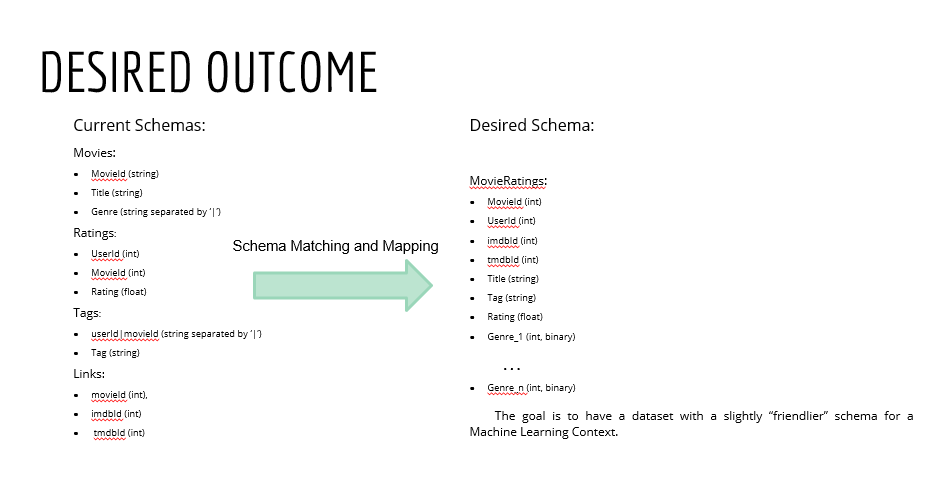

### Movies: movieId (string) -> movieId (int)

In [ ]:
movies["movieId"] = movies["movieId"].map(lambda x: int(x.split(" ")[-1]))

In [ ]:
movies.genres
out = []
for genre in movies.genres:
    out.append(genre.split('|'))

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer = MultiLabelBinarizer()
binarized_genres = binarizer.fit_transform(np.array(out))
GENRES = list(map(lambda x: "genre_"+x, binarizer.classes_))
binarized_genres

<ipython-input-192-69faab2712a8>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binarized_genres = binarizer.fit_transform(np.array(out))


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
GENRES

['genre_(no genres listed)',
 'genre_Action',
 'genre_Adventure',
 'genre_Animation',
 'genre_Children',
 'genre_Comedy',
 'genre_Crime',
 'genre_Documentary',
 'genre_Drama',
 'genre_Fantasy',
 'genre_Film-Noir',
 'genre_Horror',
 'genre_IMAX',
 'genre_Musical',
 'genre_Mystery',
 'genre_Romance',
 'genre_Sci-Fi',
 'genre_Thriller',
 'genre_War',
 'genre_Western']

## Binarize Genres, "friendlier" format for ML

In [ ]:
movies[GENRES] = binarized_genres
movies.drop(columns='genres', inplace=True)
movies

,movieId,title,genre_(no genres listed),genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Crime,genre_Documentary,...,genre_Film-Noir,genre_Horror,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now focus on tags dataframe

In [ ]:
tags.head()

,tag,timestampTag,userId|movieId
0,funny,1445714994,2|60756
1,Highly quotable,1445714996,2|60756
2,will ferrell,1445714992,2|60756
3,Boxing story,1445715207,2|89774
4,MMA,1445715200,2|89774


#### userId|movieId sring separated by "|" -> two new columns: userId (int) and movieId (int)

In [ ]:
tags["userId"] = tags["userId|movieId"].map(lambda x: int(x.split("|")[0]))
tags["movieId"] = tags["userId|movieId"].map(lambda x: int(x.split("|")[1]))

In [ ]:
tags.drop(columns="userId|movieId", inplace=True)

In [ ]:
tags.head()

,tag,timestampTag,userId,movieId
0,funny,1445714994,2,60756
1,Highly quotable,1445714996,2,60756
2,will ferrell,1445714992,2,60756
3,Boxing story,1445715207,2,89774
4,MMA,1445715200,2,89774


# EDA (Initial EDA was done with Vizier as well, further EDA can be done after applying transformations)

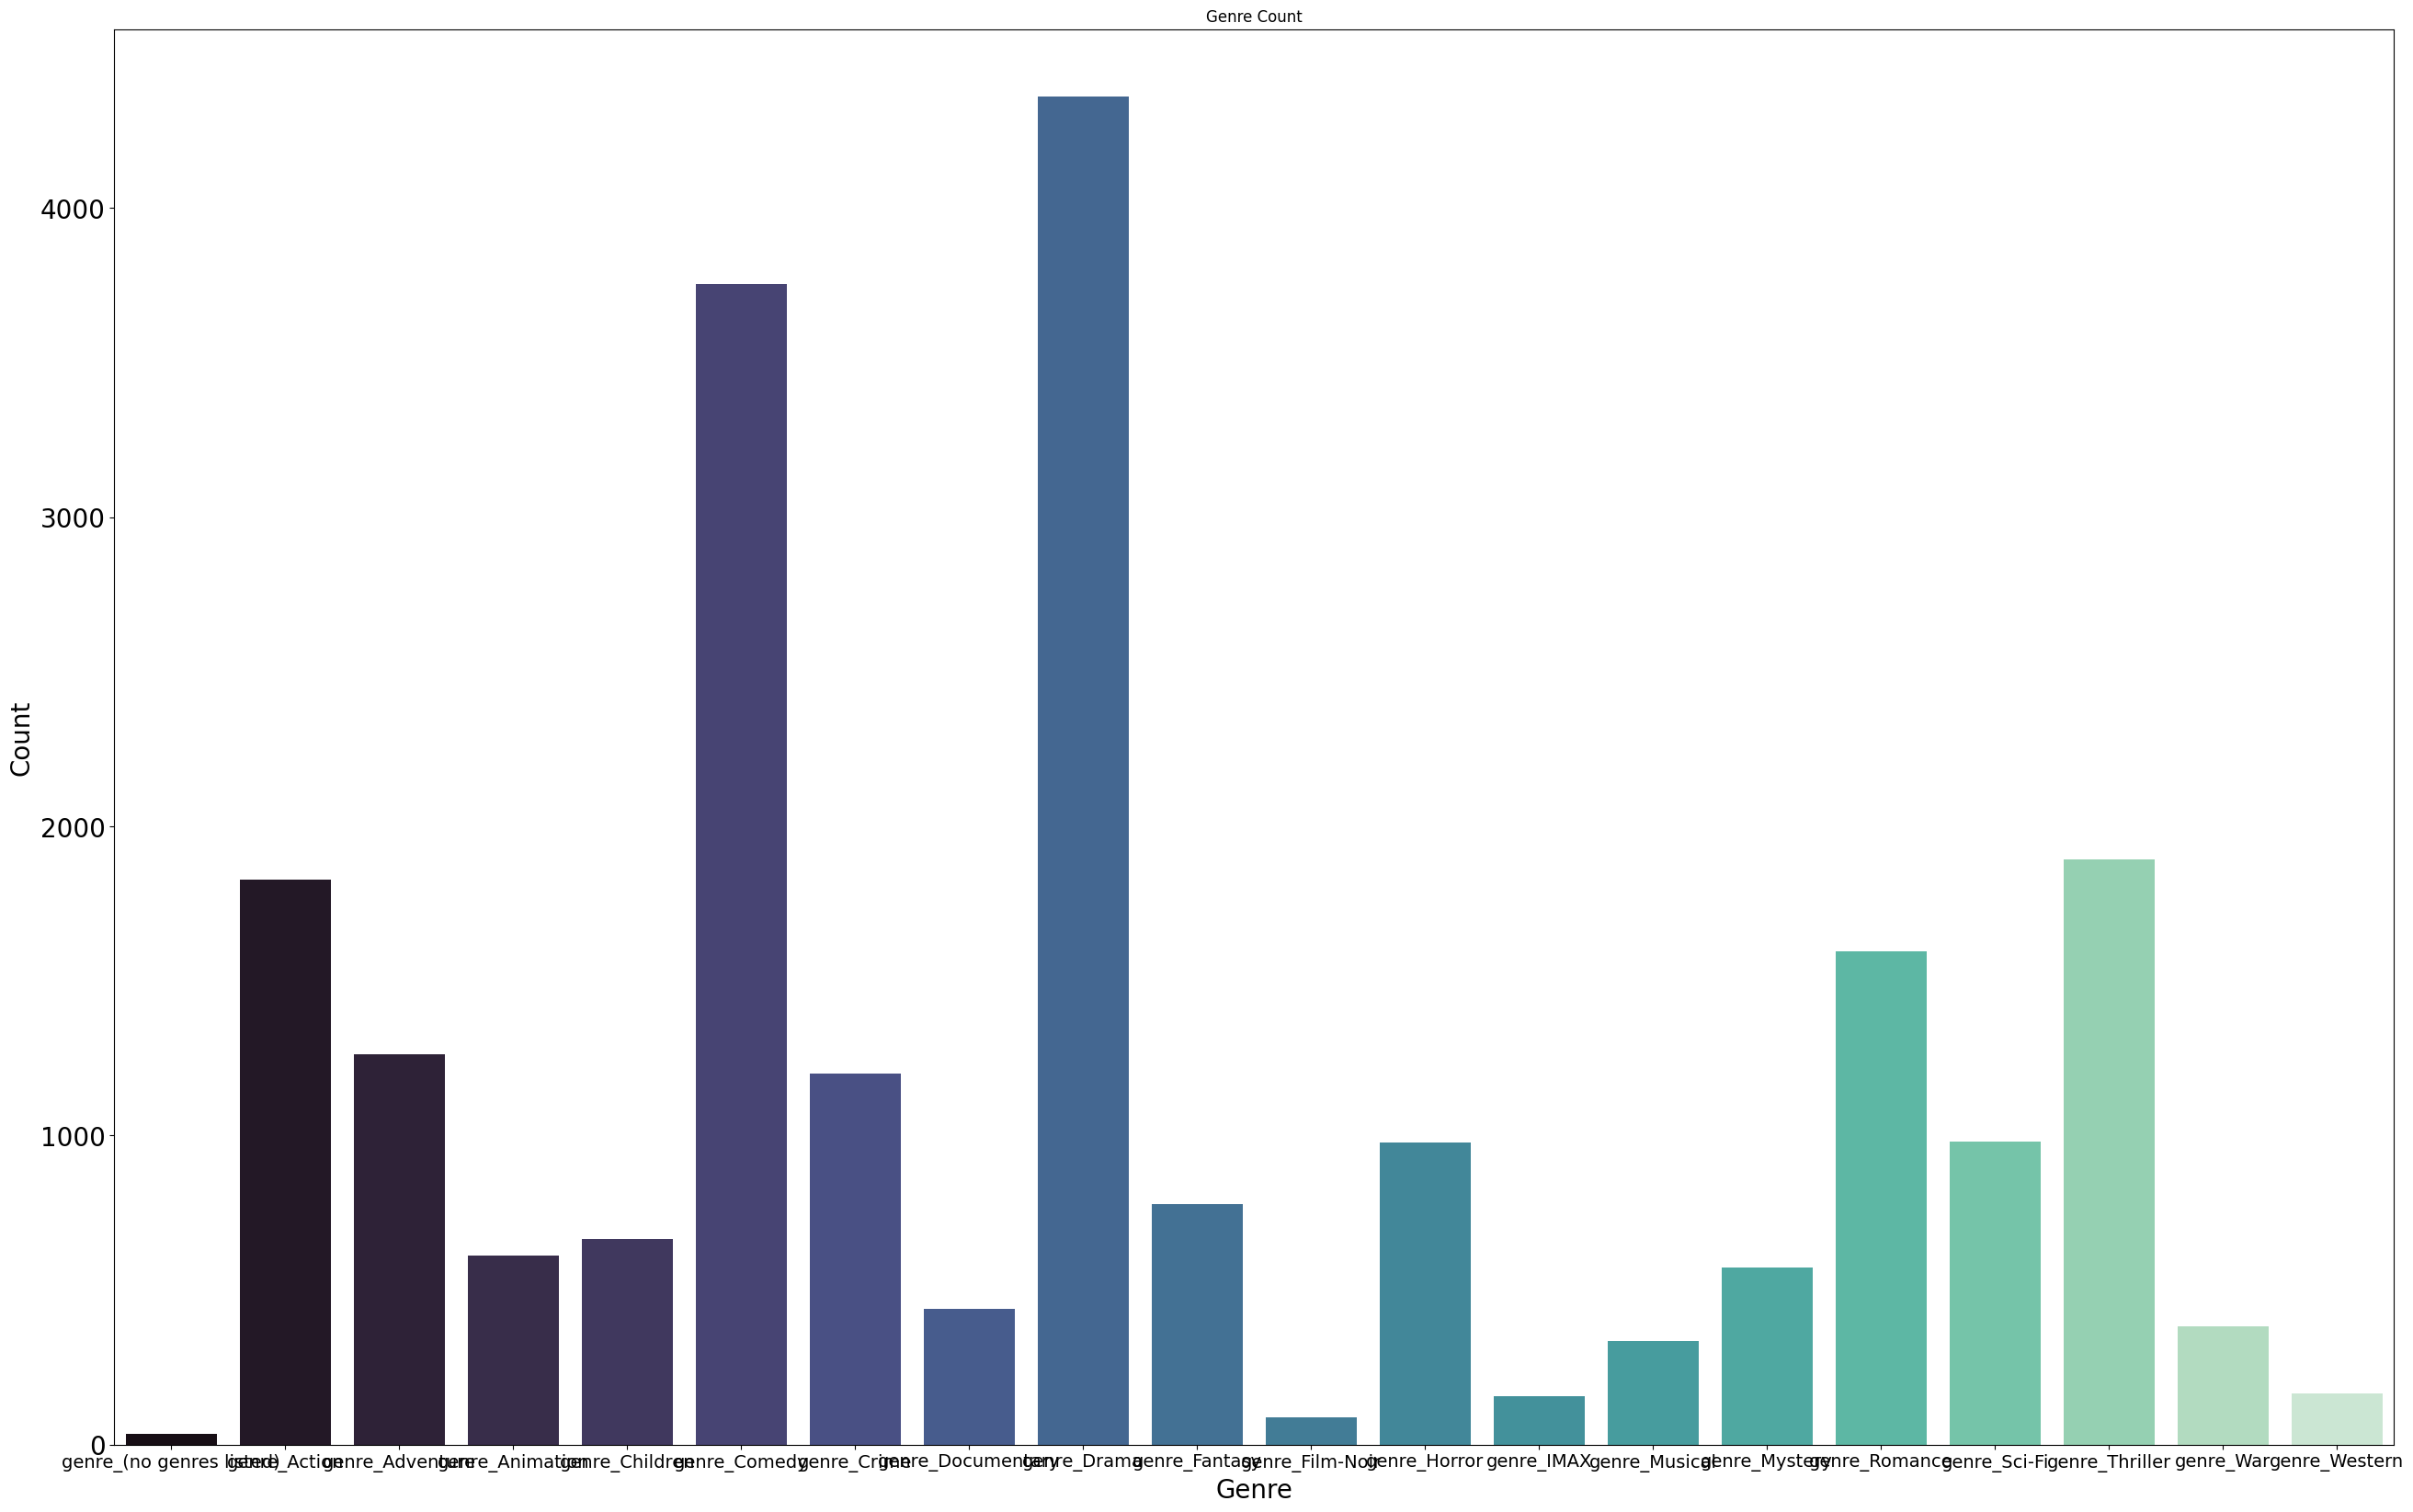

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

count = []
for c in GENRES:
    count.append(movies[c].sum())

plt.figure(figsize=(32, 20))
sns.barplot(x=GENRES, y=movies[GENRES].sum(), palette='mako')

plt.title('Genre Count')
plt.xlabel('Genre', size = 20)
plt.ylabel('Count', size = 20)
plt.xticks(size = 14)
plt.yticks(size = 20)
plt.show()

The mean rating is: 3.501556983616962
The mode rating is: 4.0


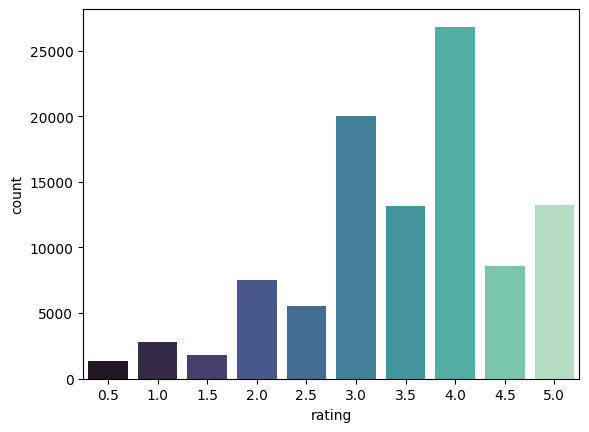

In [ ]:
sns.countplot(data=ratings, x='rating', palette='mako')
print(f"The mean rating is: {ratings.rating.mean()}")
print(f"The mode rating is: {ratings.rating.mode()[0]}")

### Ratings based on movieId

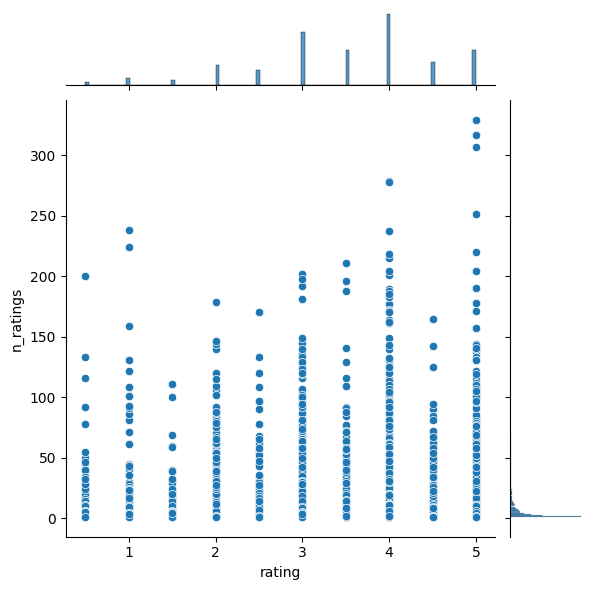

In [ ]:
ratings['n_ratings'] = pd.DataFrame(ratings.groupby('movieId').count()['rating'])
sns.jointplot(x=ratings['rating'], y=ratings['n_ratings'], data=ratings)
plt.show()
ratings.drop(columns="n_ratings", inplace=True)

### timestamp in tag != timestamp in ratings

In [ ]:
movies_ratings_df = pd.merge(movies, ratings, on=['movieId', 'movieId'], how='inner')
movies_ratings_df.head()

,movieId,title,genre_(no genres listed),genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Crime,genre_Documentary,...,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,userId,rating,timestampRatings
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,4.0,964982703
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,5,4.0,847434962
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,7,4.5,1106635946
3,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,15,2.5,1510577970
4,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,17,4.5,1305696483


In [ ]:
movies_ratings_links_df = pd.merge(movies_ratings_df, links, on=['movieId', 'movieId'], how='inner')
movies_ratings_links_df.head()

,movieId,title,genre_(no genres listed),genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Crime,genre_Documentary,...,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,userId,rating,timestampRatings,imdbId,tmdbId
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,1,4.0,964982703,114709,862.0
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,5,4.0,847434962,114709,862.0
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,7,4.5,1106635946,114709,862.0
3,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,15,2.5,1510577970,114709,862.0
4,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,17,4.5,1305696483,114709,862.0


In [ ]:
movies_ratings_links_df.isna().sum()

movieId                     0
title                       0
genre_(no genres listed)    0
genre_Action                0
genre_Adventure             0
genre_Animation             0
genre_Children              0
genre_Comedy                0
genre_Crime                 0
genre_Documentary           0
genre_Drama                 0
genre_Fantasy               0
genre_Film-Noir             0
genre_Horror                0
genre_IMAX                  0
genre_Musical               0
genre_Mystery               0
genre_Romance               0
genre_Sci-Fi                0
genre_Thriller              0
genre_War                   0
genre_Western               0
userId                      0
rating                      0
timestampRatings            0
imdbId                      0
tmdbId                      0
dtype: int64

In [ ]:
movies_ratings_links_tags_df = pd.merge(movies_ratings_links_df, tags, on=['userId', 'movieId'], how='inner')
movies_ratings_links_tags_df.head()

,movieId,title,genre_(no genres listed),genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Crime,genre_Documentary,...,genre_Thriller,genre_War,genre_Western,userId,rating,timestampRatings,imdbId,tmdbId,tag,timestampTag
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,336,4.0,1122227329,114709,862.0,pixar,1139045764
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,474,4.0,978575760,114709,862.0,pixar,1137206825
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,567,3.5,1525286001,114709,862.0,fun,1525286013
3,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,62,4.0,1528843890,113497,8844.0,fantasy,1528843929
4,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,62,4.0,1528843890,113497,8844.0,magic board game,1528843932


In [ ]:
movies_ratings_links_tags_df.isna().sum()

movieId                     0
title                       0
genre_(no genres listed)    0
genre_Action                0
genre_Adventure             0
genre_Animation             0
genre_Children              0
genre_Comedy                0
genre_Crime                 0
genre_Documentary           0
genre_Drama                 0
genre_Fantasy               0
genre_Film-Noir             0
genre_Horror                0
genre_IMAX                  0
genre_Musical               0
genre_Mystery               0
genre_Romance               0
genre_Sci-Fi                0
genre_Thriller              0
genre_War                   0
genre_Western               0
userId                      0
rating                      0
timestampRatings            0
imdbId                      0
tmdbId                      0
tag                         0
timestampTag                0
dtype: int64

In [ ]:
movies_ratings_links_tags_df["tmdbId"].fillna(-1, inplace=True)

In [ ]:
movies_ratings_links_tags_df.head()

,movieId,title,genre_(no genres listed),genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,genre_Crime,genre_Documentary,...,genre_Thriller,genre_War,genre_Western,userId,rating,timestampRatings,imdbId,tmdbId,tag,timestampTag
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,336,4.0,1122227329,114709,862.0,pixar,1139045764
1,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,474,4.0,978575760,114709,862.0,pixar,1137206825
2,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,567,3.5,1525286001,114709,862.0,fun,1525286013
3,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,62,4.0,1528843890,113497,8844.0,fantasy,1528843929
4,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,62,4.0,1528843890,113497,8844.0,magic board game,1528843932


In [ ]:
movies_ratings_links_tags_df.to_csv("movieRatings520.csv", index=False)

In [ ]:
movies_ratings_links_tags_df.columns

Index(['movieId', 'title', 'genre_(no genres listed)', 'genre_Action',
       'genre_Adventure', 'genre_Animation', 'genre_Children', 'genre_Comedy',
       'genre_Crime', 'genre_Documentary', 'genre_Drama', 'genre_Fantasy',
       'genre_Film-Noir', 'genre_Horror', 'genre_IMAX', 'genre_Musical',
       'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi', 'genre_Thriller',
       'genre_War', 'genre_Western', 'userId', 'rating', 'timestampRatings',
       'imdbId', 'tmdbId', 'tag', 'timestampTag'],
      dtype='object')

# WE HAVE SUCCESFULLY INTEGRATED OUR DATASETS TO INCLUDE INFORMATION FROM MOVIES, RATINGS, LINKS AND TAGS
## This is done while taking into account different schemas for movieids, genres column and timestamps representing different values for tags and ratings.